In [1]:
import requests
from bs4 import BeautifulSoup
import re
from nltk.tokenize import RegexpTokenizer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import wordnet as wn
import pandas as pd
from wordcloud import WordCloud

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Web Crawler & Classifier
- Convert this tutorial for our usecase [https://github.com/datacamp/datacamp_facebook_live_nlp/blob/master/NLP_FB_live_coding_soln.ipynb](https://github.com/datacamp/datacamp_facebook_live_nlp/blob/master/NLP_FB_live_coding_soln.ipynb)
- [https://www.quora.com/How-can-I-extract-keywords-from-a-document-using-NLTK](https://www.quora.com/How-can-I-extract-keywords-from-a-document-using-NLTK)
- [http://nlpforhackers.io/tf-idf/](http://nlpforhackers.io/tf-idf/)
- [http://www.tiernok.com/posts/automated-keyword-extraction-tf-idf-rake-and-textrank.html](http://www.tiernok.com/posts/automated-keyword-extraction-tf-idf-rake-and-textrank.html)

# Keyword Extraction Algorithms
1. TF-IDF
2. TextRank [https://github.com/davidadamojr/TextRank](https://github.com/davidadamojr/TextRank)
3. RAKE [https://github.com/aneesha/RAKE](https://github.com/aneesha/RAKE)

### URL of site to scrape

In [2]:
# url = "http://kutv.com/news/local/crash-on-i-84-bridge-in-riverdale"
url = "http://money.cnn.com/2017/11/17/technology/tesla-semi-truck-reveal/index.html"

# url = "http://www.inhabitat.com/the-worlds-first-space-nation-officially-in-orbit-with-new-satellite/"
# url = "http://" + "www.dailymail.co.uk" + "/news/article-5099205/Notorious-serial-killer-Charles-Manson-dies-aged-83.html"

In [3]:
r = requests.get(url)
type(r)

requests.models.Response

### Cleaning function to remove HTML Junk

In [4]:
def clean_me(soup):
    for s in soup(['script', 'style']):
        s.decompose()
    return ' '.join(soup.stripped_strings)

### Remove HTML from text

In [5]:
html = r.text
content = r.content.decode(encoding='UTF-8')
soup = BeautifulSoup(r.content.decode(encoding='UTF-8'), "lxml")

In [6]:
# soup = BeautifulSoup(html, "lxml")

In [7]:
soup.title.string

u'Tesla reveals semi-truck and new sports car - Nov. 17, 2017 '

In [8]:
link_list = []
stopwords = nltk.corpus.stopwords.words('english')
for link in soup.find_all('a'):
    link_tokens = re.findall('\w+', link.get_text())
    link_tokens = [token.lower().encode('utf-8') for token in link_tokens if token not in stopwords and token.isalpha()]
    link_list = link_list + link_tokens

print(len(link_list))    
link_list = list(set(link_list))    
print(len(link_list))
print(link_list[:100])


115
96
['unemployment', 'startups', 'policy', 'dodge', 'get', 'chiron', 'dapena', 'using', 'bank', 'adchoices', 'drop', 'disclaimer', 'financial', 'people', 'twitter', 'back', 'related', 'culture', 'peter', 'best', 'what', 'trending', 'peterdrives', 'announces', 'since', 'bonus', 'does', 'valdes', 'conditions', 'email', 'blowing', 'terms', 'business', 'million', 'november', 'card', 'bugatti', 'surge', 'credit', 'stand', 'social', 'com', 'top', 'hackers', 'fees', 'apply', 'your', 'little', 'service', 'privacy', 'franken', 'sachs', 'interest', 'musk', 'mind', 'excellent', 'worked', 'highest', 'women', 'paying', 'account', 'challenger', 'this', 'cash', 'nextadvisor', 'future', 'cards', 'making', 'uber', 'lowest', 'pic', 'demon', 'al', 'an', 'gadgets', 'intro', 'elon', 'partner', 'stole', 'pay', 'how', 'finding', 'charging', 'users', 'may', 'goldman', 'snl', 'paid', 'arrived', 'planners', 'data', 'upset', 'retirees', 'savings', 'the', 'spend']


In [9]:
p_list = []
for link in soup.find_all('p'):
    link_tokens = re.findall('\w+', link.get_text())
    link_tokens = [token.lower().encode('utf-8') for token in link_tokens if token not in stopwords and token.isalpha()]
    p_list = p_list + link_tokens
print(len(p_list))    
# link_list = list(set(p_list))    
print(len(p_list))
print(p_list[:100])

398
398
['by', 'continuing', 'use', 'site', 'agreeing', 'new', 'privacy', 'policy', 'terms', 'service', 'tesla', 'revealed', 'new', 'version', 'roadster', 'sports', 'car', 'go', 'stop', 'miles', 'hour', 'seconds', 'figure', 'would', 'make', 'fastest', 'accelerating', 'production', 'car', 'ever', 'that', 'tesla', 'unveiled', 'new', 'semi', 'truck', 'ceo', 'elon', 'musk', 'said', 'go', 'zero', 'five', 'seconds', 'empty', 'trailer', 'that', 'figure', 'usually', 'associated', 'luxury', 'sedans', 'big', 'trucks', 'with', 'full', 'load', 'truck', 'still', 'reach', 'speed', 'seconds', 'according', 'musk', 'much', 'faster', 'diesel', 'powered', 'truck', 'related', 'an', 'elon', 'musk', 'email', 'may', 'making', 'people', 'upset', 'only', 'talking', 'truck', 'speed', 'musk', 'mention', 'range', 'it', 'go', 'miles', 'full', 'load', 'highway', 'speeds', 'said', 'that', 'twice', 'distance', 'trucking', 'routes', 'musk', 'claimed']


In [10]:
# text = clean_me(soup) 
# print(text)

# Tokenize words in text
Step 1: Tokenize
You want to tokenize your text, that is, split it into a list a words.

In [11]:
# tokens = re.findall('\w+', text)
# print len(tokens)
# print(tokens[:25])

# Create tokenizer
# Create tokens

In [12]:
# # Create tokenizer
# tokenizer = RegexpTokenizer('\w+')
# # Create tokens
# tokens = tokenizer.tokenize(text)
# print(len(tokens))
# tokens[:8]

# Initialize new list

In [13]:
lemmatizer = nltk.stem.WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(token.lower()) for token in p_list]
print tokens[:8]
print(len(tokens))

['by', 'continuing', 'use', 'site', 'agreeing', 'new', 'privacy', 'policy']
398


# Removing stop words and alpha only characters

In [14]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[:25])
tokens = [token for token in tokens if token not in stopwords and token.isalpha() and len(token) > 3]
print tokens[:25]
print(len(tokens))

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they']
['continuing', 'site', 'agreeing', 'privacy', 'policy', u'term', 'service', 'tesla', 'revealed', 'version', 'roadster', u'sport', 'stop', u'mile', 'hour', u'second', 'figure', 'would', 'make', 'fastest', 'accelerating', 'production', 'ever', 'tesla', 'unveiled']
312


# Remove words if it is in a link a href Tag on their site

In [15]:
# tokens = [token for token in tokens if token not in link_list and len(token) > 3]
# print tokens[:25]
# print(len(tokens))

# Word Count

In [16]:
new_words_ns = {}
for t in tokens:
    if t not in new_words_ns.keys():
        new_words_ns[t] = 1
    else:
        new_words_ns[t] = int(new_words_ns[t]) + 1

tokens_count = pd.DataFrame(new_words_ns.items(), columns=['Word', 'Count'])\
       .sort(['Count'], ascending=[False])\
       .reset_index(drop=True)
print tokens_count

             Word  Count
0           truck     10
1            mile      9
2           tesla      9
3           jones      7
4            musk      6
5           right      6
6           index      5
7            said      5
8        roadster      5
9          second      5
10          speed      5
11        version      4
12         diesel      4
13         driver      4
14       reserved      4
15           semi      4
16           also      3
17           time      3
18          still      3
19           hour      3
20        service      3
21           make      3
22      trademark      3
23           cost      3
24         system      3
25          range      2
26       standard      2
27           seat      2
28           elon      2
29           opco      2
..            ...    ...
160       usually      1
161    regardless      1
162          year      1
163       battery      1
164   distributed      1
165       running      1
166          djia      1
167  specifically      1


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


# Word Cloud
- http://nlpforhackers.io/word-clouds/

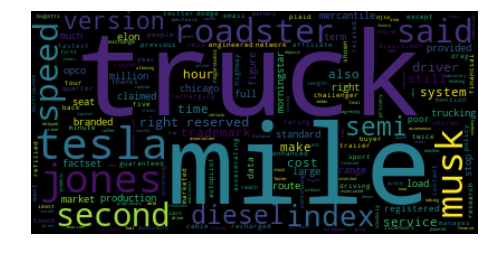

In [17]:
wc = WordCloud().generate(' '.join(tokens))
 
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Create freq dist and plot

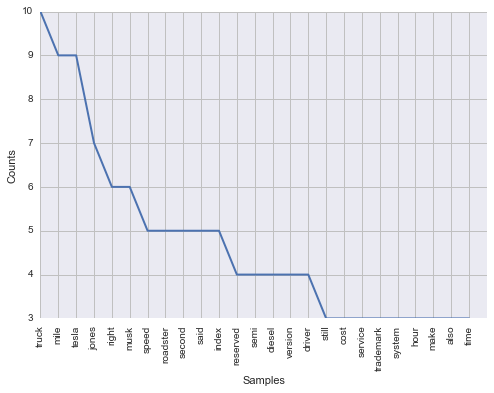

In [18]:
# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(tokens)
freqdist1.plot(25)